In [1]:
import numpy as np
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('/mnt/efs/data/climate_indices.csv')
df['time'] = pd.DatetimeIndex(df.time)
df = df.set_index('time')[['year','nao','ao']].loc['1990-01-01':'2018-12-31'].groupby(['year']).mean()

In [3]:
idx = pd.read_table('/mnt/efs/notebooks/04/nao_station_djfm.txt',delim_whitespace=True,header=None,skiprows=1,
                    index_col=0,names=['NAO'])

df['nao_djfm'] = idx.loc[(idx.index >= 1990)&(idx.index < 2019)].NAO

In [4]:
oaf = pd.read_csv('/mnt/efs/data/oaflux_htfl_wspg.csv')

oaf = oaf.set_index('time').sort_index()
oaf.index = pd.DatetimeIndex(oaf.index)
oaf_3m = oaf.rolling(3,center=False).mean()
oaf_djf = oaf_3m[oaf_3m.index.month==2]
oaf_djf['year'] = oaf_djf.index.year
oaf_djf.set_index('year',inplace=True)
df['htfl_lsea'] = oaf_djf-oaf_djf.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
oaf = pd.read_csv('/mnt/efs/data/oaflux_htfl_spna.csv')

oaf = oaf.set_index('time').sort_index()
oaf.index = pd.DatetimeIndex(oaf.index)
oaf_3m = oaf.rolling(3,center=False).mean()
oaf_djf = oaf_3m[oaf_3m.index.month==2]
oaf_djf['year'] = oaf_djf.index.year
oaf_djf.set_index('year',inplace=True)
df['htfl_spna'] = oaf_djf-oaf_djf.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
lfwc = pd.read_csv('/mnt/efs/data/hadobs_en4_lfwc_spna_upper700m_monthly.csv')
lfwc['year'] = pd.DatetimeIndex(lfwc.time).year
df['lfwc_en4'] = lfwc.groupby(['year']).mean()['lfwc']

In [6]:
lfwc = pd.read_csv('/mnt/efs/data/eccov4r4_lfwc_spna_upper700m_monthly.csv')
lfwc['year'] = pd.DatetimeIndex(lfwc.time).year
df['lfwc_eccov4'] = lfwc.groupby(['year']).mean()['lfwc']

In [7]:
ohc = pd.read_csv('/mnt/efs/data/hadobs_en4_hc_spna_upper700m_monthly.csv')
ohc['year'] = pd.DatetimeIndex(ohc.time).year
df['ohc_en4'] = ohc.groupby(['year']).mean()['ohc']

In [8]:
ohc = pd.read_csv('/mnt/efs/data/eccov4r4_hc_spna_upper700m_monthly.csv')
ohc['year'] = pd.DatetimeIndex(ohc.time).year
df['ohc_eccov4'] = ohc.groupby(['year']).mean()['ohc']

In [9]:
idx = pd.read_csv('/mnt/efs/data/convection_depth.csv').rename(columns={'Year': 'year',' Max_Depth': 'max_depth', 
                                                                        ' Max_Sigma2': 'max_sigma2'})
idx['max_depth'] = pd.to_numeric(idx['max_depth'].astype(str).str[:-1], errors='coerce')
df['lsw_depth'] = idx.set_index('year')['max_depth']

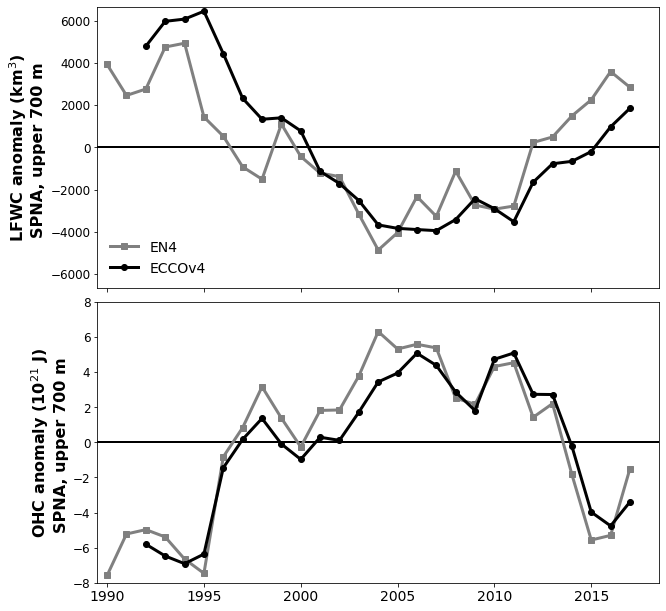

In [10]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,10))
fig.tight_layout()
fig.subplots_adjust(left=0.15, right=0.8, bottom=0.1, top=0.9, hspace=0.05)

#axs[0].fill([2003.5,2005.5,2005.5,2003.5],[-7e3,-7e3,7e3,7e3],'grey', alpha=0.2, edgecolor='None')
axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[0].plot(df.index, df['lfwc_en4'], lw=3, color='grey', linestyle='-', marker='s', label='EN4')
axs[0].plot(df.index, df['lfwc_eccov4'], lw=3, color='k', linestyle='-', marker='o', label='ECCOv4')
axs[0].set_xlim([1989.5,2018.5])
axs[0].set_xticks(np.arange(1990,2020,5))
axs[0].set_ylim([-6650,6650])
axs[0].set_yticks(np.arange(-6000,8000,2000))
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_ylabel('LFWC anomaly (km$^3$)\nSPNA, upper 700 m ', fontsize=16, color='k', fontweight='bold')
axs[0].legend(loc='lower left',frameon=False, fontsize=14)

#axs[1].fill([2003.5,2005.5,2005.5,2003.5],[-9,-9,9,9],'grey', alpha=0.2, edgecolor='None')
axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[1].plot(df.index, df['ohc_en4']*1e-21, lw=3, color='grey', linestyle='-', marker='s', label='EN4')
axs[1].plot(df.index, df['ohc_eccov4']*1e-21, lw=3, color='k', linestyle='-', marker='o', label='ECCOv4')
axs[1].set_xlim([1989.5,2018.5])
axs[1].set_xticks(np.arange(1990,2020,5))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].set_ylim([-8,8])
axs[1].set_yticks(np.arange(-8,10,2))
axs[1].yaxis.set_tick_params(labelsize=12)

axs[1].set_ylabel('OHC anomaly (10$^{21}$ J)\nSPNA, upper 700 m ', fontsize=16, color='k', fontweight='bold')

#plt.savefig('/mnt/efs/figure.png')
plt.show()

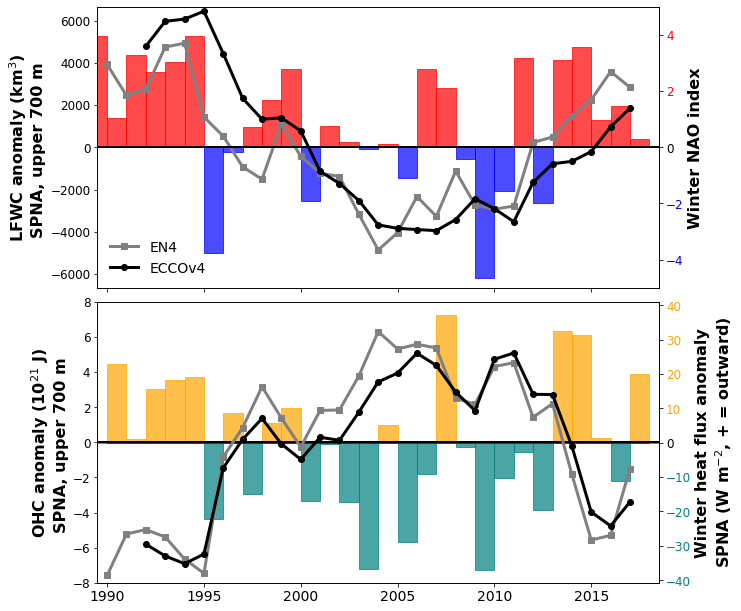

In [13]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,10))
fig.tight_layout()
fig.subplots_adjust(left=0.15, right=0.8, bottom=0.1, top=0.9, hspace=0.05)

#axs[0].fill([2003.5,2005.5,2005.5,2003.5],[-7e3,-7e3,7e3,7e3],'grey', alpha=0.2, edgecolor='None')
axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[0].plot(df.index, df['lfwc_en4'], lw=3, color='grey', linestyle='-', marker='s', label='EN4',zorder=1)
axs[0].plot(df.index, df['lfwc_eccov4'], lw=3, color='k', linestyle='-', marker='o', label='ECCOv4',zorder=1)
axs[0].set_xlim([1989.5,2018.5])
axs[0].set_xticks(np.arange(1990,2020,5))
axs[0].set_ylim([-6650,6650])
axs[0].set_yticks(np.arange(-6000,8000,2000))
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_ylabel('LFWC anomaly (km$^3$)\nSPNA, upper 700 m ', fontsize=16, color='k', fontweight='bold')
axs[0].legend(loc='lower left',frameon=False, fontsize=14)

axa = axs[0].twinx()
axa.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axa.bar(df.index-0.5, np.clip(df.nao_djfm.values,0,np.nan), 1, align='center', color='red', edgecolor='red', 
        alpha=0.7, label=None, zorder=0)
axa.bar(df.index-0.5, np.clip(df.nao_djfm.values,np.nan,0), 1, align='center', color='blue', edgecolor='blue',
        alpha=0.7,label=None,zorder=0)
axa.set_xlim([1989.5,2018.5])
axa.set_xticks(np.arange(1990,2020,5))
axa.set_ylim([-5,5])
axa.set_yticks(np.arange(-4,6,2))
[axa.get_yticklabels()[i].set_color('b')  if (axa.get_yticks()[i] < 0 ) \
    else axa.get_yticklabels()[i].set_color('r') if ( axa.get_yticks()[i] > 0 ) \
    else axa.get_yticklabels()[i].set_color('k') for i in range(len(axa.get_yticklabels()))]
axa.yaxis.set_tick_params(labelsize=12)
axa.set_ylabel(r'Winter NAO index', fontsize=16, color='k', fontweight='bold')
axs[0].set_zorder(axa.get_zorder()+1)
axs[0].patch.set_visible(False)

#axs[1].fill([2003.5,2005.5,2005.5,2003.5],[-9,-9,9,9],'grey', alpha=0.2, edgecolor='None')
axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[1].plot(df.index, df['ohc_en4']*1e-21, lw=3, color='grey', linestyle='-', marker='s', label='EN4')
axs[1].plot(df.index, df['ohc_eccov4']*1e-21, lw=3, color='k', linestyle='-', marker='o', label='ECCOv4')
axs[1].set_xlim([1989.5,2018.5])
axs[1].set_xticks(np.arange(1990,2020,5))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].set_ylim([-8,8])
axs[1].set_yticks(np.arange(-8,10,2))
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].set_ylabel('OHC anomaly (10$^{21}$ J)\nSPNA, upper 700 m ', fontsize=16, color='k', fontweight='bold')

axb = axs[1].twinx()
axb.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axb.bar(df.index-0.5, np.clip(df.htfl_spna.values,0,np.nan), 1, align='center', color='orange', edgecolor='orange', 
           alpha=0.7, label=None, zorder=0)
axb.bar(df.index-0.5, np.clip(df.htfl_spna.values,np.nan,0), 1, align='center', color='teal', edgecolor='teal', 
           alpha=0.7,label=None,zorder=0)
axb.set_xlim([1989.5,2018.5])
axb.set_xticks(np.arange(1990,2020,5))
#axb.set_ylim([-110,110])
#axb.set_yticks(np.arange(-100,120,25))
[axb.get_yticklabels()[i].set_color('teal')  if (axb.get_yticks()[i] < 0 ) \
    else axb.get_yticklabels()[i].set_color('orange') if ( axb.get_yticks()[i] > 0 ) \
    else axb.get_yticklabels()[i].set_color('k') for i in range(len(axb.get_yticklabels()))]
axb.yaxis.set_tick_params(labelsize=12)
axb.set_ylabel('Winter heat flux anomaly\nSPNA (W m$^{-2}$, + = outward)', 
               fontsize=16, color='k', fontweight='bold')
axs[1].set_zorder(axb.get_zorder()+1)
axs[1].patch.set_visible(False)

plt.savefig('/mnt/efs/figure.png')
plt.show()

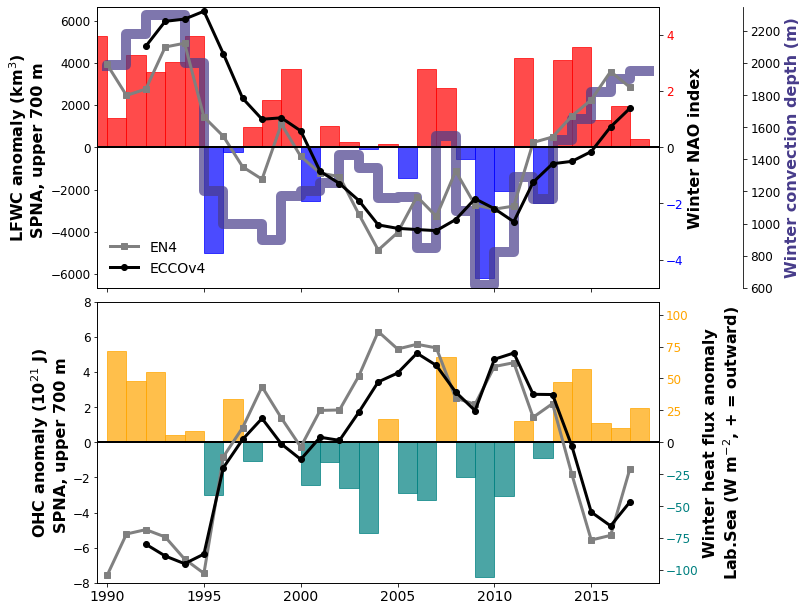

In [65]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,10))
fig.tight_layout()
fig.subplots_adjust(left=0.15, right=0.8, bottom=0.1, top=0.9, hspace=0.05)

#axs[0].fill([2003.5,2005.5,2005.5,2003.5],[-7e3,-7e3,7e3,7e3],'grey', alpha=0.2, edgecolor='None')
axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[0].plot(df.index, df['lfwc_en4'], lw=3, color='grey', linestyle='-', marker='s', label='EN4',zorder=1)
axs[0].plot(df.index, df['lfwc_eccov4'], lw=3, color='k', linestyle='-', marker='o', label='ECCOv4',zorder=1)
axs[0].set_xlim([1989.5,2018.5])
axs[0].set_xticks(np.arange(1990,2020,5))
axs[0].set_ylim([-6650,6650])
axs[0].set_yticks(np.arange(-6000,8000,2000))
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_ylabel('LFWC anomaly (km$^3$)\nSPNA, upper 700 m ', fontsize=16, color='k', fontweight='bold')
axs[0].legend(loc='lower left',frameon=False, fontsize=14)

axa = axs[0].twinx()
axa.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axa.bar(df.index-0.5, np.clip(df.nao_djfm.values,0,np.nan), 1, align='center', color='red', edgecolor='red', 
        alpha=0.7, label=None, zorder=0)
axa.bar(df.index-0.5, np.clip(df.nao_djfm.values,np.nan,0), 1, align='center', color='blue', edgecolor='blue',
        alpha=0.7,label=None,zorder=0)
axa.set_xlim([1989.5,2018.5])
axa.set_xticks(np.arange(1990,2020,5))
axa.set_ylim([-5,5])
axa.set_yticks(np.arange(-4,6,2))
[axa.get_yticklabels()[i].set_color('b')  if (axa.get_yticks()[i] < 0 ) \
    else axa.get_yticklabels()[i].set_color('r') if ( axa.get_yticks()[i] > 0 ) \
    else axa.get_yticklabels()[i].set_color('k') for i in range(len(axa.get_yticklabels()))]
axa.yaxis.set_tick_params(labelsize=12)
axa.set_ylabel(r'Winter NAO index', fontsize=16, color='k', fontweight='bold')
axs[0].set_zorder(axa.get_zorder()+1)
axs[0].patch.set_visible(False)

axa2 = axs[0].twinx()
axa2.spines['right'].set_position(('axes', 1.15))
axa2.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axa2.step(df.index, df['lsw_depth'], lw=10, color='darkslateblue', where='pre',alpha=0.7)
axa2.set_xlim([1989.5,2018.5])
axa2.set_ylim([600,2350])
axa2.set_yticks(np.arange(600,2400,200))
axa2.yaxis.set_tick_params(labelsize=12)
axa2.set_ylabel(r'Winter convection depth (m)', fontsize=16, color='darkslateblue', fontweight='bold')

#axs[1].fill([2003.5,2005.5,2005.5,2003.5],[-9,-9,9,9],'grey', alpha=0.2, edgecolor='None')
axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k')
axs[1].plot(df.index, df['ohc_en4']*1e-21, lw=3, color='grey', linestyle='-', marker='s', label='EN4')
axs[1].plot(df.index, df['ohc_eccov4']*1e-21, lw=3, color='k', linestyle='-', marker='o', label='ECCOv4')
axs[1].set_xlim([1989.5,2018.5])
axs[1].set_xticks(np.arange(1990,2020,5))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].set_ylim([-8,8])
axs[1].set_yticks(np.arange(-8,10,2))
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].set_ylabel('OHC anomaly (10$^{21}$ J)\nSPNA, upper 700 m ', fontsize=16, color='k', fontweight='bold')

axb = axs[1].twinx()
axb.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color = 'k')
axb.bar(df.index-0.5, np.clip(df.htfl.values,0,np.nan), 1, align='center', color='orange', edgecolor='orange', 
           alpha=0.7, label=None, zorder=0)
axb.bar(df.index-0.5, np.clip(df.htfl.values,np.nan,0), 1, align='center', color='teal', edgecolor='teal', 
           alpha=0.7,label=None,zorder=0)
axb.set_xlim([1989.5,2018.5])
axb.set_xticks(np.arange(1990,2020,5))
axb.set_ylim([-110,110])
axb.set_yticks(np.arange(-100,120,25))
[axb.get_yticklabels()[i].set_color('teal')  if (axb.get_yticks()[i] < 0 ) \
    else axb.get_yticklabels()[i].set_color('orange') if ( axb.get_yticks()[i] > 0 ) \
    else axb.get_yticklabels()[i].set_color('k') for i in range(len(axb.get_yticklabels()))]
axb.yaxis.set_tick_params(labelsize=12)
axb.set_ylabel('Winter heat flux anomaly\nLab.Sea (W m$^{-2}$, + = outward)', 
               fontsize=16, color='k', fontweight='bold')
axs[1].set_zorder(axb.get_zorder()+1)
axs[1].patch.set_visible(False)

plt.savefig('/mnt/efs/figure.png')
plt.show()